In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polar coordinate plots

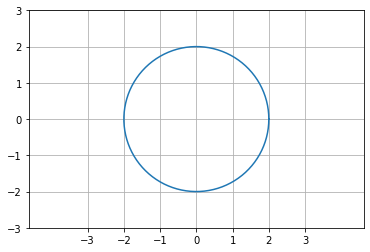

In [2]:
radius = 2
angle = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots() 

# For the same scaling
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html
ax.axis('equal')

ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid()

ax.plot(radius * np.cos(angle), radius * np.sin(angle))
plt.show()

# Trigonometric functions

## tan(θ)

Beware the cycle of θ in ```(-pi/2, +pi/2)``` as tan(θ)=+/-inf for ```-pi / 2``` and ```pi / 2```. 

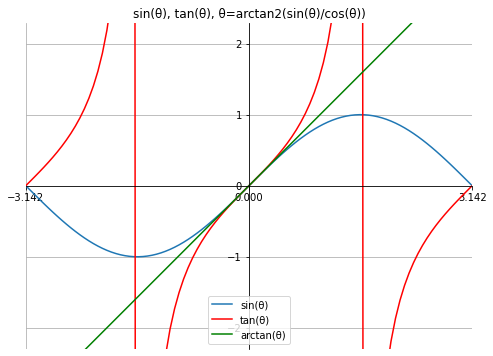

In [15]:
# --------------------------------------------------------------------------------
# Plot space (axes)
# --------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,6)) 
ax.axis('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# --------------------------------------------------------------------------------
# Set plot space limis and ticks
# --------------------------------------------------------------------------------
cycles = 1
radius = 2
boundaries = [-cycles * np.pi, cycles * np.pi]

ax.set_xticks(np.linspace(boundaries[0], boundaries[1], 3))
ax.set_yticks(np.linspace(-radius, radius, 2*radius +1))
ax.set_xlim(-cycles * np.pi, cycles * np.pi)
ax.set_ylim(-radius, radius)

# --------------------------------------------------------------------------------
# sin(θ), tan(θ), θ=arctan2(sin(θ)/cos(θ))
# --------------------------------------------------------------------------------
θ = np.linspace(-cycles * np.pi, cycles * np.pi, 100)
ax.plot(θ, np.sin(θ), label="sin(θ)")
ax.plot(θ, np.tan(θ), label="tan(θ)", color='r')
ax.plot(θ, np.arctan2(np.sin(θ), np.cos(θ)), label="arctan(θ)", color='g')

ax.grid()
ax.set_title("sin(θ), tan(θ), θ=arctan2(sin(θ)/cos(θ))")
ax.legend()

## arctan2(y/x)

> Array of angles in radians, in the range ```[-pi, pi]```.

arcus/arc means inverse. atan(rise) or actan(rise) is the inverse of tan(θ) to get θ.

<img src="image/arcus_tangent.png" align="left" width=300/>

<img src="image/arctan.png" align="left" width=300/>

In [64]:
import itertools
for x, y in itertools.product([0, 1, -1], repeat=2):
    print(f"For (x,y)=({x:2},{y:2}), arctan2(y, x) is {np.arctan2(y, x) / np.pi :6} pi")    # -4/pi


For (x,y)=( 0, 0), arctan2(y, x) is    0.0 pi
For (x,y)=( 0, 1), arctan2(y, x) is    0.5 pi
For (x,y)=( 0,-1), arctan2(y, x) is   -0.5 pi
For (x,y)=( 1, 0), arctan2(y, x) is    0.0 pi
For (x,y)=( 1, 1), arctan2(y, x) is   0.25 pi
For (x,y)=( 1,-1), arctan2(y, x) is  -0.25 pi
For (x,y)=(-1, 0), arctan2(y, x) is    1.0 pi
For (x,y)=(-1, 1), arctan2(y, x) is   0.75 pi
For (x,y)=(-1,-1), arctan2(y, x) is  -0.75 pi


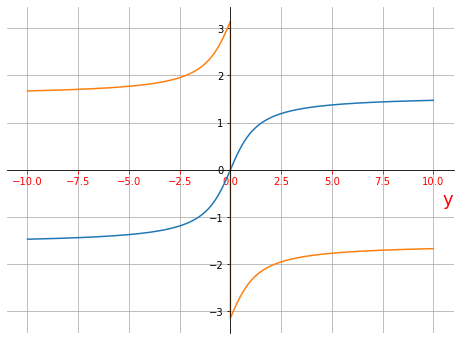

In [74]:
x1 = 1
y = np.linspace(-10, 10, 10001)[1:]

fig, ax = plt.subplots(figsize=(8,6)) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.set_xlabel("y", loc='right', fontsize=18, color='r')
ax.tick_params(axis='x', colors='red')
ax.grid()

x2 = -1
ax.plot(y/x1, np.arctan2(y, x1), label="atan2(y/x=1)")
ax.plot(y/x2, np.arctan2(y, x2), label="atan2(y/x=-1)")
#ax.legend()


# Verify in-between angles

Verify if X is in-between ```θ```, angles ```a``` and ```b```.

<img src="image/find_angle_from_rise.png" width=450 align="left"/>

In [5]:
def is_point_within_angles(x, y, start: float, end: float):
    """Check if the point(x, y) is within or on the angles a and b.
    Args:
        x: x-coordinate of the poit 
        y: y-coordinate of the point
        start: start angle (0<= start < 2*np.pi)
        end: end angle     (start <=end < 2 *np.pi)
    Returns: Boolean
    """
    assert 0 <= start <= end < (2 * np.pi), "start/end in-between [0, 2pi)."
    θ = np.arctan2(y, x)
    return np.logical_and(start <= θ, θ <= end)


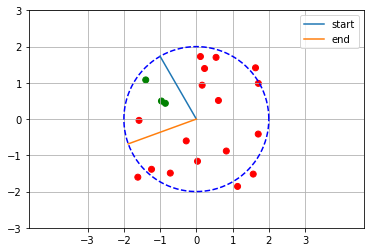

In [8]:
start = 2 * np.pi * (120/360)
end = 2 * np.pi * (200/360)
colors=np.array(['red', 'green'])

radius = 2
angle = np.linspace(0, 2 * np.pi, 100)

# --------------------------------------------------------------------------------
# Circle area
# --------------------------------------------------------------------------------
fig, ax = plt.subplots() 
ax.axis('equal')
ax.set_xticks(np.linspace(-3, 3, 7))
ax.set_yticks(np.linspace(-3, 3, 7))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.grid()
ax.plot(radius * np.cos(angle), radius * np.sin(angle), "b--")

# --------------------------------------------------------------------------------
# Start/end angles
# --------------------------------------------------------------------------------
ax.plot([0, radius * np.cos(start)], [0, radius * np.sin(start)], label="start")
ax.plot([0, radius * np.cos(end)], [0, radius * np.sin(end)], label="end")

# --------------------------------------------------------------------------------
# Plot random points
# --------------------------------------------------------------------------------
N = 20
X = np.random.uniform(-radius, radius, N)
Y = np.random.uniform(-radius, radius, N)

# --------------------------------------------------------------------------------
#  In-between-ness c as color of each point(x, y)
# --------------------------------------------------------------------------------
C = colors[is_point_within_angles(X, Y, start, end).astype(int)]

# --------------------------------------------------------------------------------
# Plot color-classified points.
# --------------------------------------------------------------------------------
ax.scatter(X, Y, marker='o', color=C)
ax.legend()
